# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")

Distribución de la variable objetivo (fraud):
fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


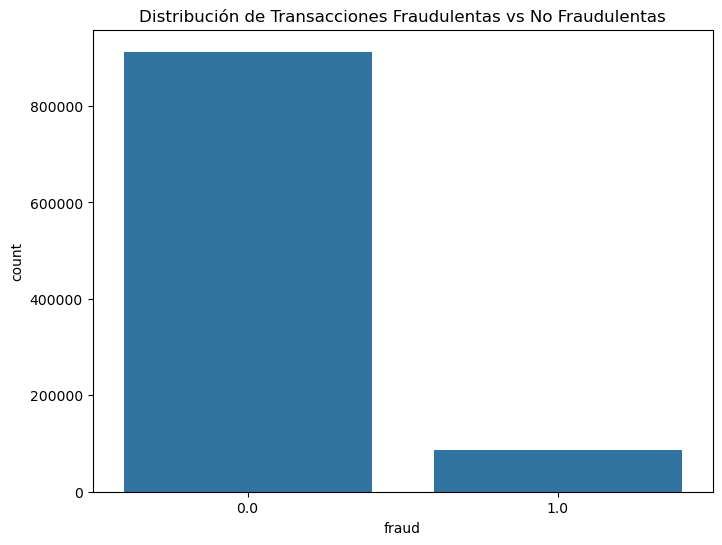

In [5]:
# 1. Analizar la distribución de la variable objetivo
print("Distribución de la variable objetivo (fraud):")
print(fraud['fraud'].value_counts(normalize=True))
plt.figure(figsize=(8, 6))
sns.countplot(data=fraud, x='fraud')
plt.title('Distribución de Transacciones Fraudulentas vs No Fraudulentas')
plt.show()

In [6]:
# Preparar los datos
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(y_true, y_pred, title="Model Evaluation"):
    print(f"\n{title}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Modelo Base:


/opt/anaconda3/envs/ironhack_labs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Modelo Base

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.90      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



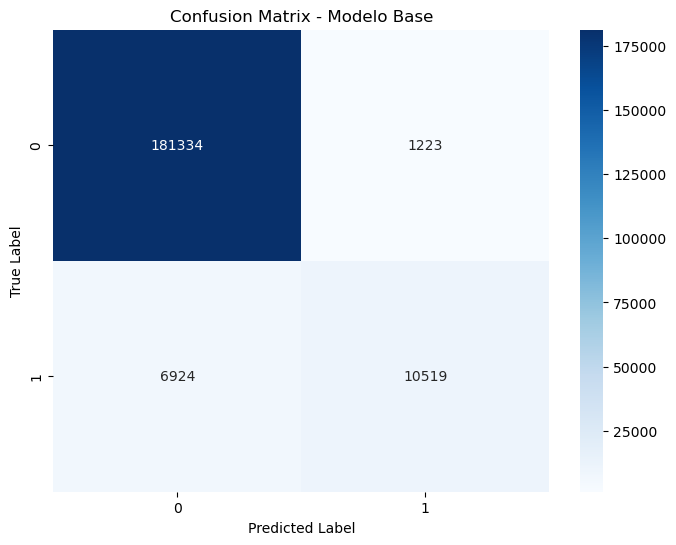

In [7]:
# 2. Modelo base sin ajustes
print("\nModelo Base:")
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
evaluate_model(y_test, base_pred, "Modelo Base")


Modelo con class_weight='balanced':


/opt/anaconda3/envs/ironhack_labs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Modelo Balanceado

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.57      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



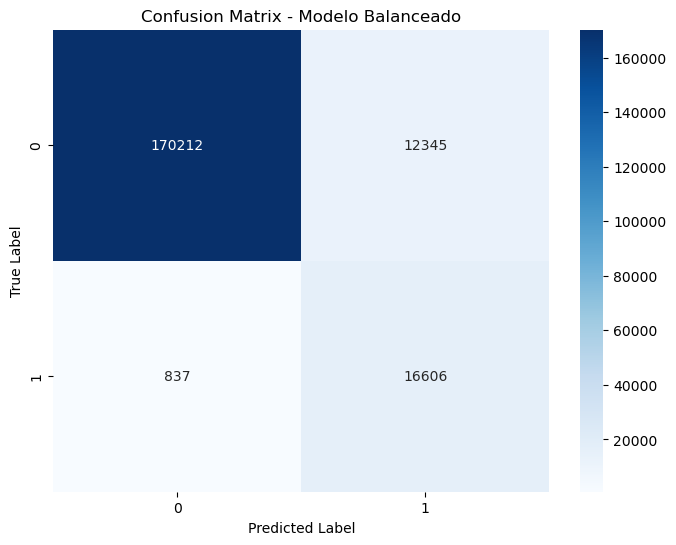

In [8]:
# 3. Modelo con class_weight='balanced'
print("\nModelo con class_weight='balanced':")
balanced_model = LogisticRegression(class_weight='balanced', random_state=42)
balanced_model.fit(X_train, y_train)
balanced_pred = balanced_model.predict(X_test)
evaluate_model(y_test, balanced_pred, "Modelo Balanceado")

In [9]:
# 4. Oversampling manual
# Encontrar las muestras de la clase minoritaria (fraud=1)
fraud_samples = X_train[y_train == 1]
fraud_labels = y_train[y_train == 1]
non_fraud_samples = X_train[y_train == 0]
non_fraud_labels = y_train[y_train == 0]

# Calcular cuántas veces necesitamos duplicar las muestras de fraude
n_oversample = len(non_fraud_samples) // len(fraud_samples)

In [10]:
# Duplicar las muestras de fraude
oversampled_fraud = pd.concat([fraud_samples] * n_oversample)
oversampled_fraud_labels = pd.concat([fraud_labels] * n_oversample)

# Combinar con las muestras no fraudulentas
X_train_over = pd.concat([non_fraud_samples, oversampled_fraud])
y_train_over = pd.concat([non_fraud_labels, oversampled_fraud_labels])

In [11]:
print("\nModelo con Oversampling manual:")
over_model = LogisticRegression(random_state=42)
over_model.fit(X_train_over, y_train_over)


Modelo con Oversampling manual:


/opt/anaconda3/envs/ironhack_labs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)


Modelo con Oversampling

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000



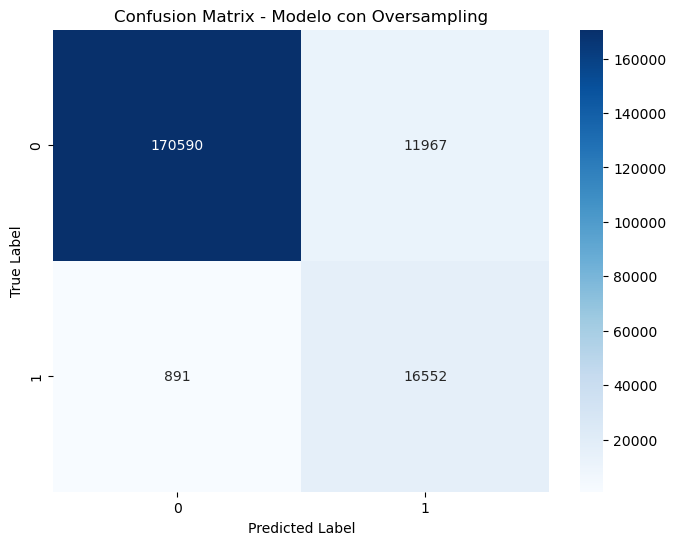


Accuracy:
Base Model: 0.959265
Balanced Model: 0.93409
Oversampling Model: 0.93571


In [13]:
over_pred = over_model.predict(X_test)
evaluate_model(y_test, over_pred, "Modelo con Oversampling")

# Evaluate accuracy, f1-score.
from sklearn.metrics import accuracy_score, f1_score

# Accuracy
base_acc = accuracy_score(y_test, base_pred)
balanced_acc = accuracy_score(y_test, balanced_pred)
over_acc = accuracy_score(y_test, over_pred)

# F1-Score
base_f1 = f1_score(y_test, base_pred)
balanced_f1 = f1_score(y_test, balanced_pred)
over_f1 = f1_score(y_test, over_pred)

print("\nAccuracy:")
print(f"Base Model: {base_acc}")
print(f"Balanced Model: {balanced_acc}")
print(f"Oversampling Model: {over_acc}")


In [14]:
# 5. Undersampling manual
# Tomar una muestra aleatoria de las transacciones no fraudulentas del mismo tamaño que las fraudulentas
non_fraud_undersampled = non_fraud_samples.sample(n=len(fraud_samples), random_state=42)
non_fraud_labels_undersampled = y_train[non_fraud_undersampled.index]

# Combinar con las muestras fraudulentas
X_train_under = pd.concat([fraud_samples, non_fraud_undersampled])
y_train_under = pd.concat([fraud_labels, non_fraud_labels_undersampled])

print("\nModelo con Undersampling manual:")
under_model = LogisticRegression(random_state=42)
under_model.fit(X_train_under, y_train_under)


Modelo con Undersampling manual:


/opt/anaconda3/envs/ironhack_labs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)


Modelo con Undersampling

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



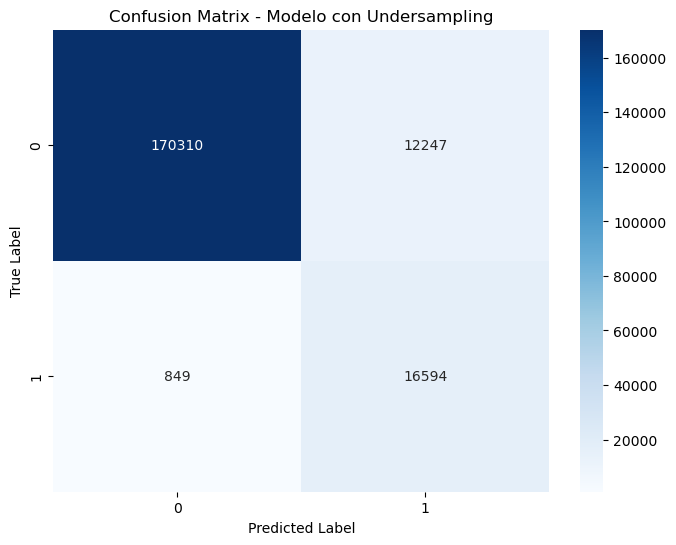

In [15]:
under_pred = under_model.predict(X_test)
evaluate_model(y_test, under_pred, "Modelo con Undersampling")

# Evaluate accuracy, f1-score.
# Accuracy
under_acc = accuracy_score(y_test, under_pred)

# F1-Score
under_f1 = f1_score(y_test, under_pred)

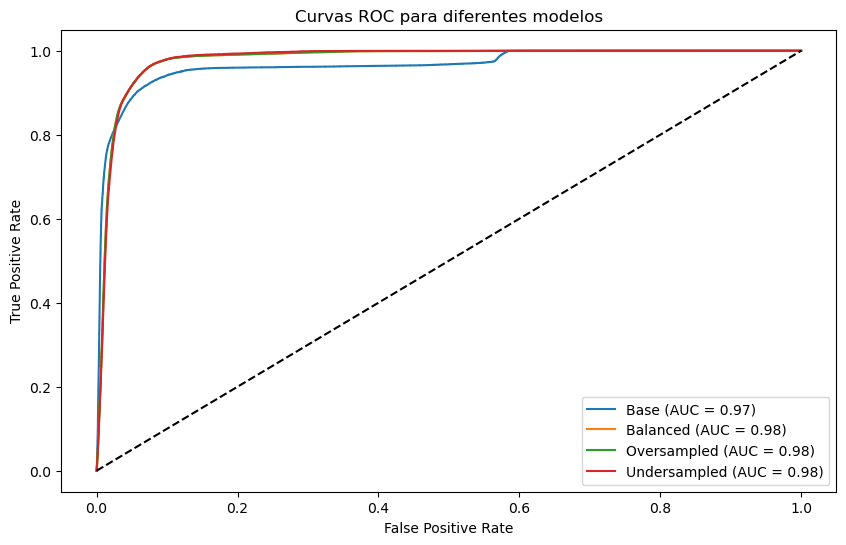

In [16]:
# Comparar curvas ROC para todos los modelos
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
models = {
    'Base': base_model,
    'Balanced': balanced_model,
    'Oversampled': over_model,
    'Undersampled': under_model
}

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para diferentes modelos')
plt.legend()
plt.show()

In [18]:
# 6. Finally, run SMOTE in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Función para implementar SMOTE manualmente
def simple_smote(X, y, k=5):
    # Separar la clase minoritaria
    minority_class = X[y == 1]
    
    # Encontrar k vecinos más cercanos
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(minority_class)
    distances, indices = nn.kneighbors(minority_class)
    
    # Calcular cuántas muestras sintéticas necesitamos
    n_minority = len(minority_class)
    n_majority = len(X[y == 0])
    n_synthetic = n_majority - n_minority
    
    # Generar muestras sintéticas
    synthetic_samples = []
    for _ in range(n_synthetic):
        # Elegir una muestra aleatoria
        idx = np.random.randint(0, n_minority)
        # Elegir uno de sus k vecinos más cercanos aleatoriamente
        nn_idx = indices[idx, np.random.randint(1, k)]
        # Generar una muestra sintética
        sample = minority_class.iloc[idx]
        nn_sample = minority_class.iloc[nn_idx]
        synthetic_sample = sample + np.random.random() * (nn_sample - sample)
        synthetic_samples.append(synthetic_sample)
    
    # Convertir a DataFrame
    synthetic_samples = pd.DataFrame(synthetic_samples, columns=X.columns)
    
    # Combinar datos originales y sintéticos
    X_smote = pd.concat([X, synthetic_samples])
    y_smote = pd.concat([y, pd.Series([1] * n_synthetic)])
    
    return X_smote, y_smote

In [19]:
# Cargar y preparar datos
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE
X_train_smote, y_train_smote = simple_smote(X_train, y_train)

In [20]:
# Entrenar modelo con datos SMOTE
smote_model = LogisticRegression(random_state=42)
smote_model.fit(X_train_smote, y_train_smote)

/opt/anaconda3/envs/ironhack_labs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [21]:
smote_pred = smote_model.predict(X_test)

# Evaluar modelo
print("\nEvaluación del modelo con SMOTE:")
print(classification_report(y_test, smote_pred))


Evaluación del modelo con SMOTE:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.56      0.95      0.71     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



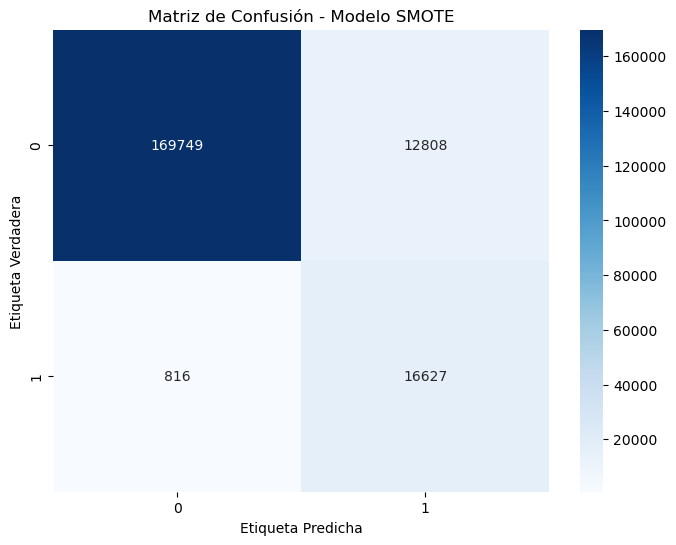

In [22]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, smote_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Modelo SMOTE')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

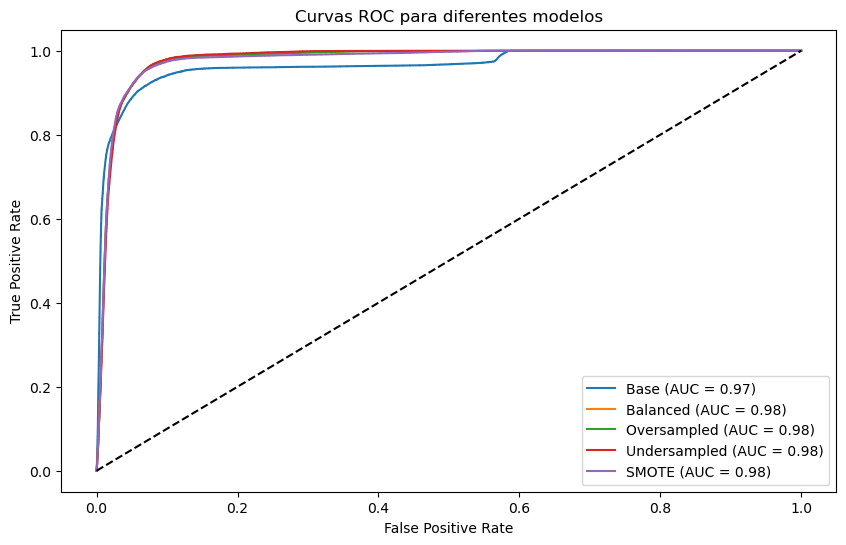

In [23]:
# Comparar con modelos anteriores
plt.figure(figsize=(10, 6))
models = {
    'Base': base_model,
    'Balanced': balanced_model,
    'Oversampled': over_model,
    'Undersampled': under_model,
    'SMOTE': smote_model
}

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para diferentes modelos')
plt.legend()
plt.show()